# Harish Practise House Price Prediction using MLR and KRR

# Import Libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load Dataset

In [4]:
df = pd.read_csv('kc_house_data.csv')

# Explanatory Data Analysis

In [5]:
print(df.head())
print(df.info())
print(df.describe())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

# Correlation Heatmap

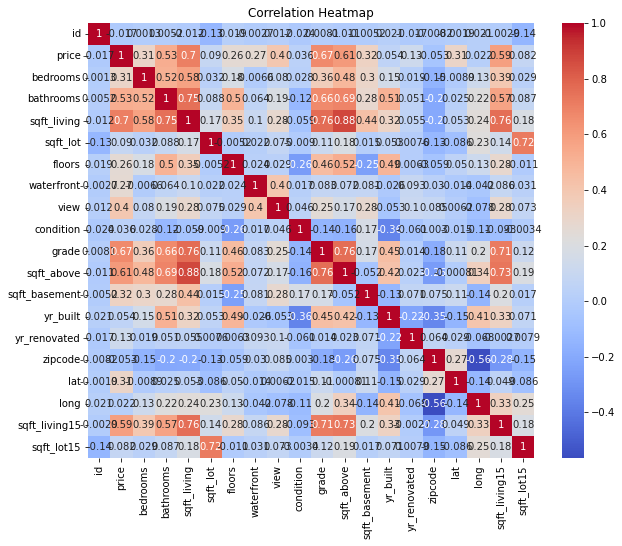

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Feature Selection

In [22]:
features = ['bedrooms','bathrooms','sqft_living','floors']
X = df[features]
y = df['price']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Model 1 : MultiLinear Regression

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate MLR

In [26]:
r2_lr = r2_score(y_test,y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test,y_pred_lr)

In [27]:
print(f"\nMLR R2 Score : {r2_lr:.4f}")
print(f"MLR RMSE: {np.sqrt(mse_lr):.2f}")
print(f"MLR MAE: {mae_lr:.2f}")


MLR R2 Score : 0.5089
MLR RMSE: 272471.26
MLR MAE: 174685.69


# Residual Plot-->MLR

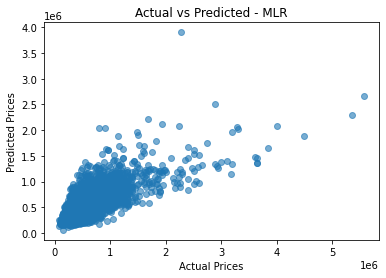

In [30]:
plt.scatter(y_test,y_pred_lr,alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted - MLR')
plt.show()

# Model 2: Kernel Ridge Regression

In [33]:
krr = KernelRidge(kernel='rbf')
krr.fit(X_train, y_train)
y_pred_krr = krr.predict(X_test)

# Evaluate KRR

In [37]:
r2_krr = r2_score(y_test, y_pred_krr)
mse_krr = mean_squared_error(y_test, y_pred_krr)
mae_krr = mean_absolute_error(y_test, y_pred_krr)

In [38]:
print(f"\nKRR R2 Score: {r2_krr:.4f}")
print(f"KRR RMSE: {np.sqrt(mse_krr):.2f}")
print(f"KRR MAE: {mae_krr:.2f}")


KRR R2 Score: 0.0734
KRR RMSE: 374271.95
KRR MAE: 197798.99


# Residual Plot – KRR

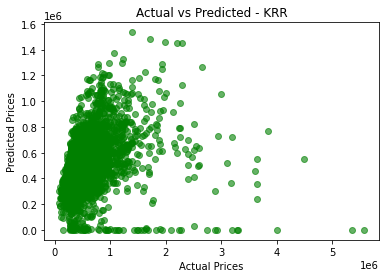

In [39]:
plt.scatter(y_test, y_pred_krr, alpha=0.6, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted - KRR")
plt.show()

In [40]:
print("\nModel Comparison:")
print(f"MLR R2: {r2_lr:.4f}, KRR R2: {r2_krr:.4f}")
print("KRR is more flexible due to non-linear mapping (RBF kernel), potentially better for complex data.")


Model Comparison:
MLR R2: 0.5089, KRR R2: 0.0734
KRR is more flexible due to non-linear mapping (RBF kernel), potentially better for complex data.
